# Evaluation Project 4 GLobal Power Plant.
#### By: Heramb Gadgil


### Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity 
when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or 
document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [24]:
# importing necessary libraries
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [25]:
# Importing csv files
# Importing the dataset of Indian Power plant
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [26]:
df.shape

(907, 27)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### Observations:
- Dataset contains 907 rows and 27 columns
- Some of feature are with object datatypes and other with float.
- other_fuel3,estimated_generation_gwh,wepp_id,other_fuel2 are empty columns.

# Stastical inforamtion

#### 
Before Going for Statistical exploration of data, first check integrity of data & Missing valu

## Data Integrity Check

#### Let check if any whitespace,'?' 'NA' or '-' exist in dataset.e

In [28]:
df.isin([' ','NA','-','?']).sum().any()

False

#### Observations and conclusion:
No whitespace, NA, '-' exist in dataset.

##### 
Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [29]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

##### No duplicate value present in the datset.

If we Check CSV file and look at dataset head, there are lot of data cleaning operation need to done before performing any EDA and ML modelling.At first sight we can come across following observation in CSV file:
- Lot of missing data in certain columns.
- Lot of Non relevant data like gppd_idnr,url.
- and many more.

At end data need to clean and we will try to do some feature engineering afterwards to modify some columns.

### Start with looking at missing value.

##### Before checking null value and missing value imputation , first remove empty columns and non relevalent columns.

Columns we are going remove are :
- estimated_generation_gwh - Empty
- wepp_id - Empty
- other_fuel1 - More than 80% ofdata missing
- other_fuel2 - 98% data missing
- other_fuel3 - 99% data missing
- year_of_capacity_data - single unique value
- owner - More than 60% data is missing
- country - non relevalent info
- country_long - non relevalent info
- gppd_idnr -non relevalent info
- url - No missing value but of no use

In [30]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [31]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                906       99.889746
other_fuel1                        709       78.169791
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2017                461       50.826902
generation_gwh_2013                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
commissioning_year                 374       41.234840
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


#### Proposed Strategy to Handle Missing data :
- As Geolocation source is categorical data we can impute it with mode of category.
- longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.

There are 7 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further
- It is important feature in for coal and hydro powerplant.
- It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
- Some new powerplant commission between 2013 and 2019. For these powerplant some data will definitely available.
- We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
- We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
- We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.


#### Other_fuel1 is another feature of some importance with missing value. Lets dive into it -
- Not every powerplant build to work with alternate fuel.
- Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
- For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

In [33]:
# dropping column because its almost empty
df.drop("generation_gwh_2019",axis=1,inplace=True)
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


### Missing value Impuatation

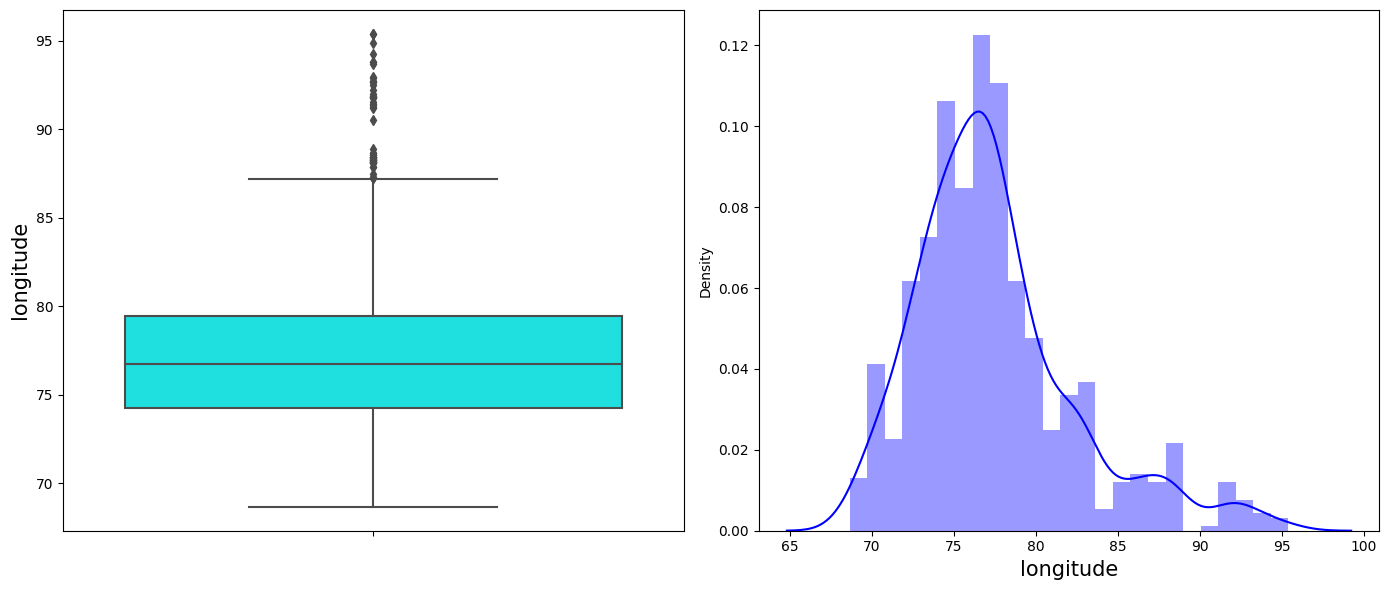

In [34]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

#### Based on presense of outliers we will impute longitude we with median.

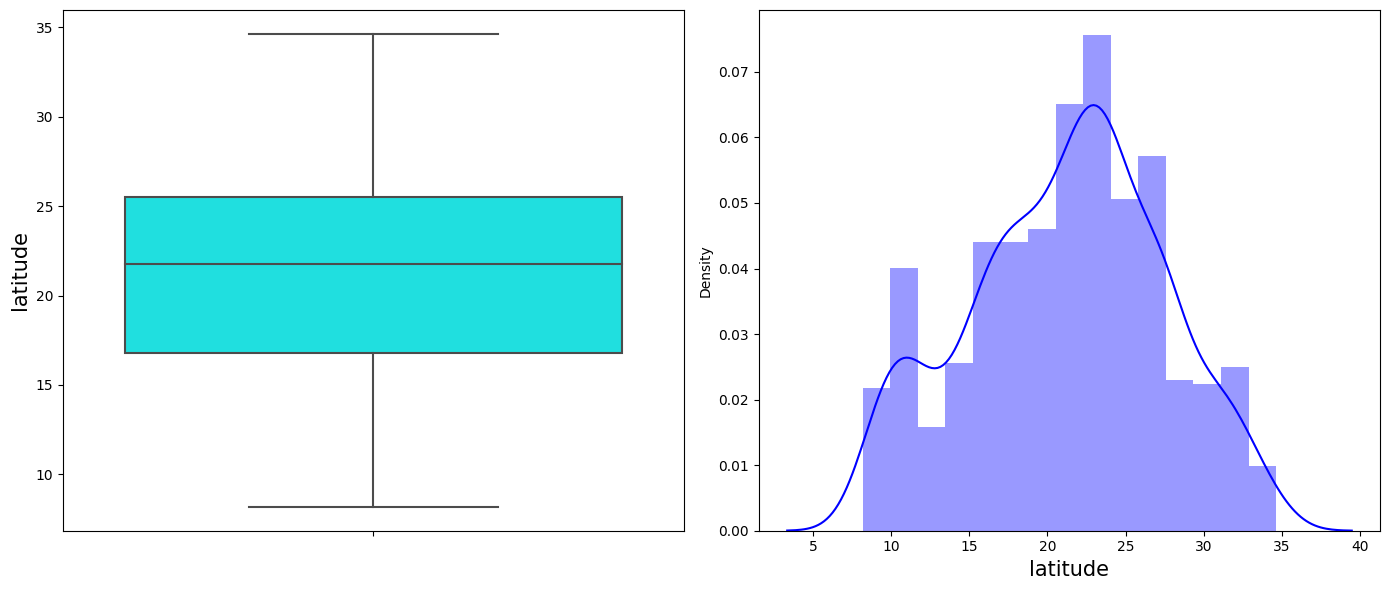

In [35]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

#### Based on absense of outliers we will impute latitude we with mean.

In [36]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [37]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2013                461       50.826902
generation_gwh_2017                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
commissioning_year                 374       41.234840
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


### Statstical Matrix

In [38]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,533.000000,446.000000,404.000000,428.000000,440.000000,446.000000,453.000000
mean,326.223755,21.197918,77.427103,1997.078799,436.579872,2410.620062,2406.769148,2449.949567,2531.301939,2595.299215
std,590.085456,6.079148,4.815073,17.119477,1624.717598,4002.130125,4170.303340,4139.826108,4174.261177,4294.595169
min,0.000000,8.168900,68.644700,1927.000000,-947.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,0.688250,219.417762,180.793688,186.152062,178.397305,196.054800
50%,59.200000,21.281800,76.719500,2001.000000,14.264000,794.587100,697.450781,737.205450,817.977250,798.381000
75%,385.250000,25.176450,79.206100,2012.000000,138.133250,3014.967937,3020.045750,3269.942437,3263.677500,3139.308000
max,4760.000000,34.649000,95.408000,2018.000000,14779.303000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#### Observation and conclusion:
- Bigest Powerplant has power generation capacity of 4760 MW.
- In each Generation-GWHours columns Mean is greater than Median.
- Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
- Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.
- Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

### We have two different Target feature for regression and classification model. LetStart exploring both Target Feature

# Regression Target feature - Capacity
#### Before visualing feature let find details about Smallest & Biggest Powerplant

In [39]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [40]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,11.354,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [41]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,0.0,NaN,NaN,NaN,NaN,NaN,NaN


#### comments:
- Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
- Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

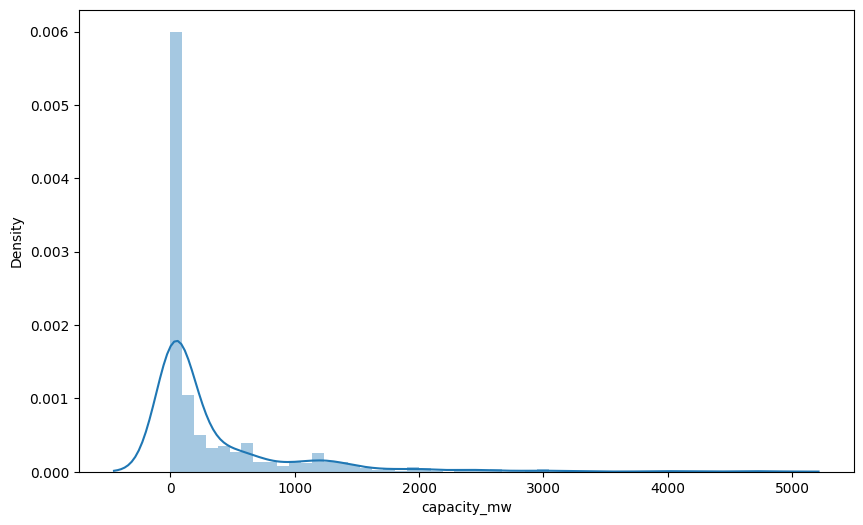

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(df.capacity_mw)
plt.show()

##### We can see there are very powerplant of capacity more than 1500 MW. Let check

In [44]:
df.loc[df.capacity_mw >1500].shape

(39, 16)

There 39 powerplant of capacity more than 1500 MW.

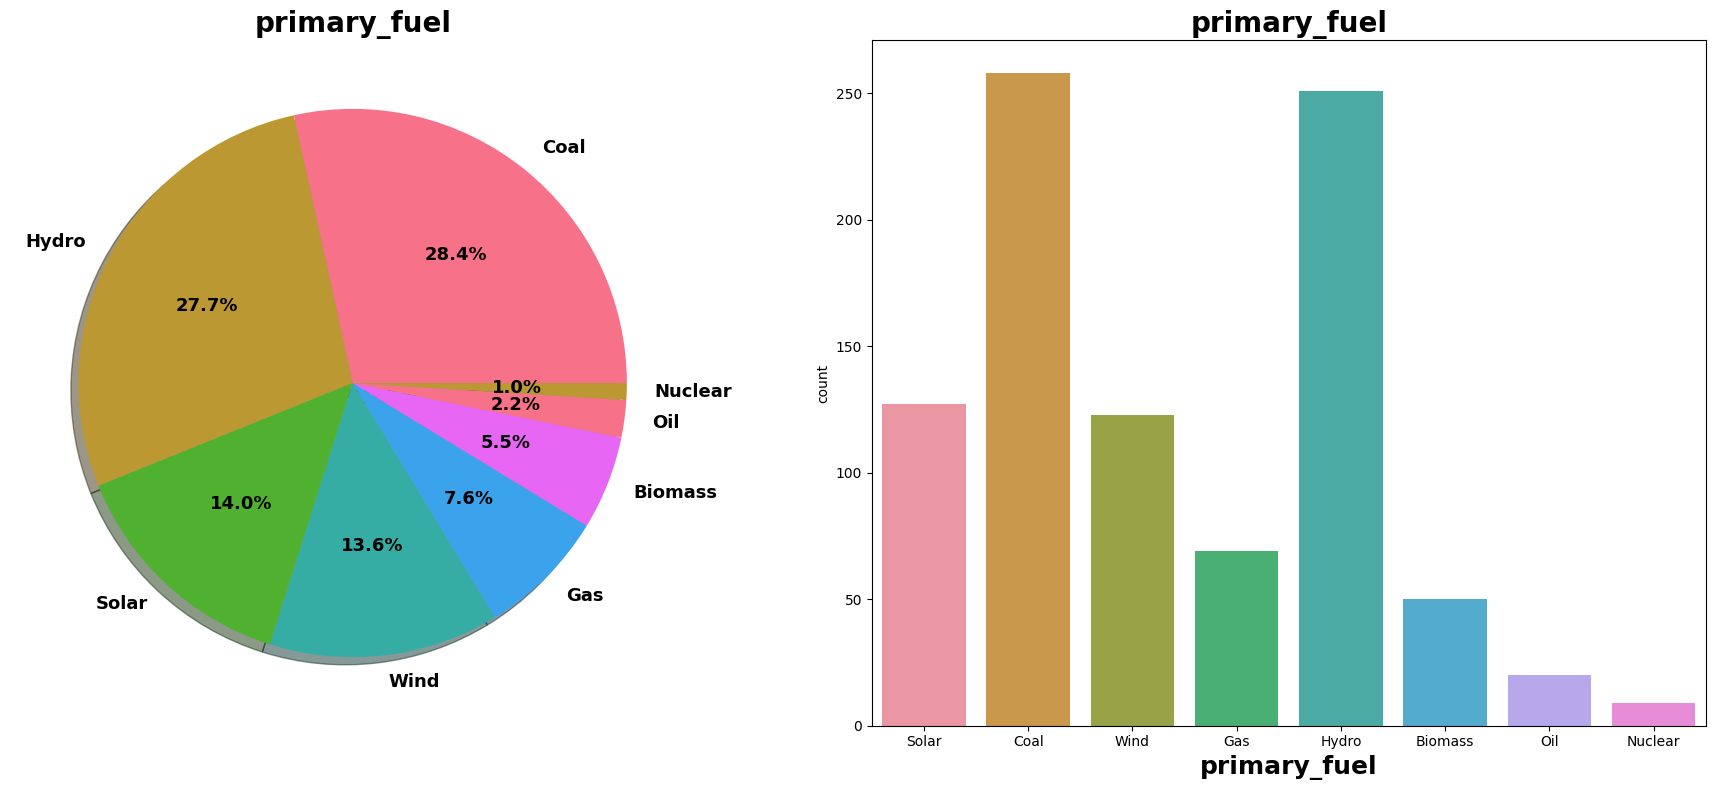

In [49]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [50]:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

#### Observations and conclusions:
- Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
- Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.
- There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.

##### Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.

In [51]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


#### Now Let check sector wise Capacity.



In [52]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


#### Observations:
- Out of Total PowerGeneration Maximum comes from Coal.
- Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.

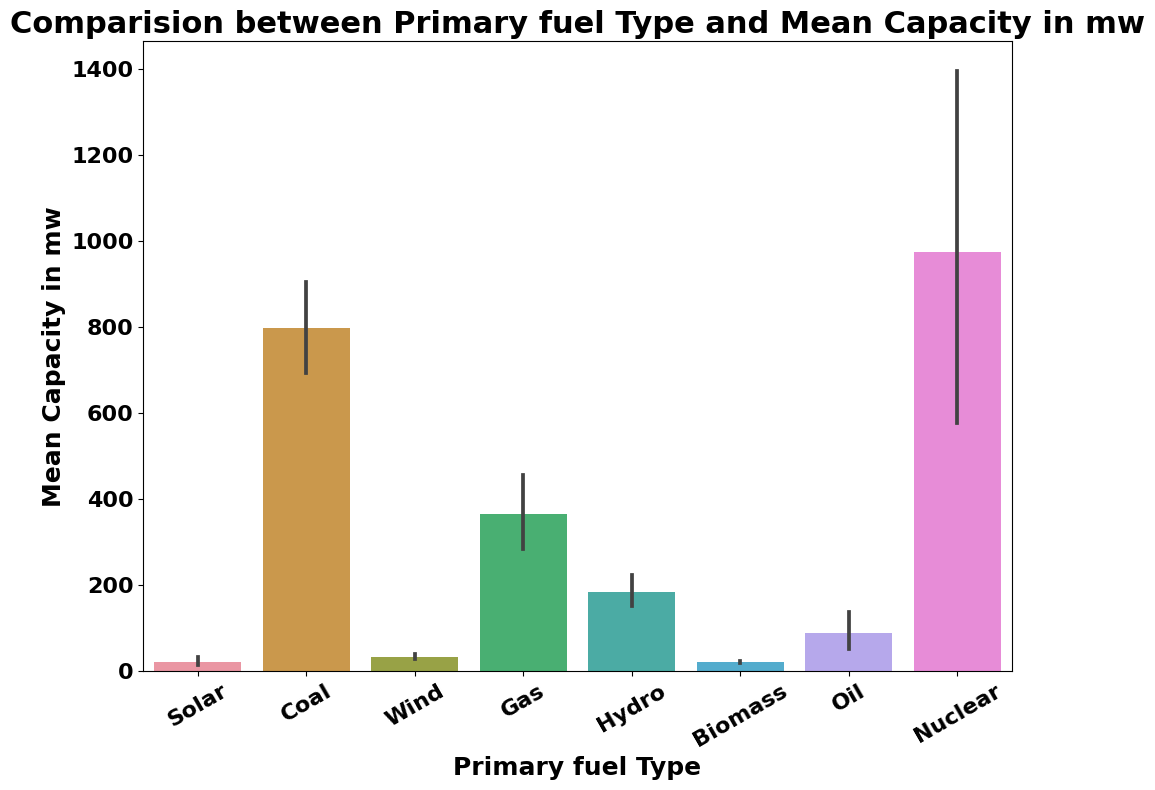

In [53]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

#### Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.

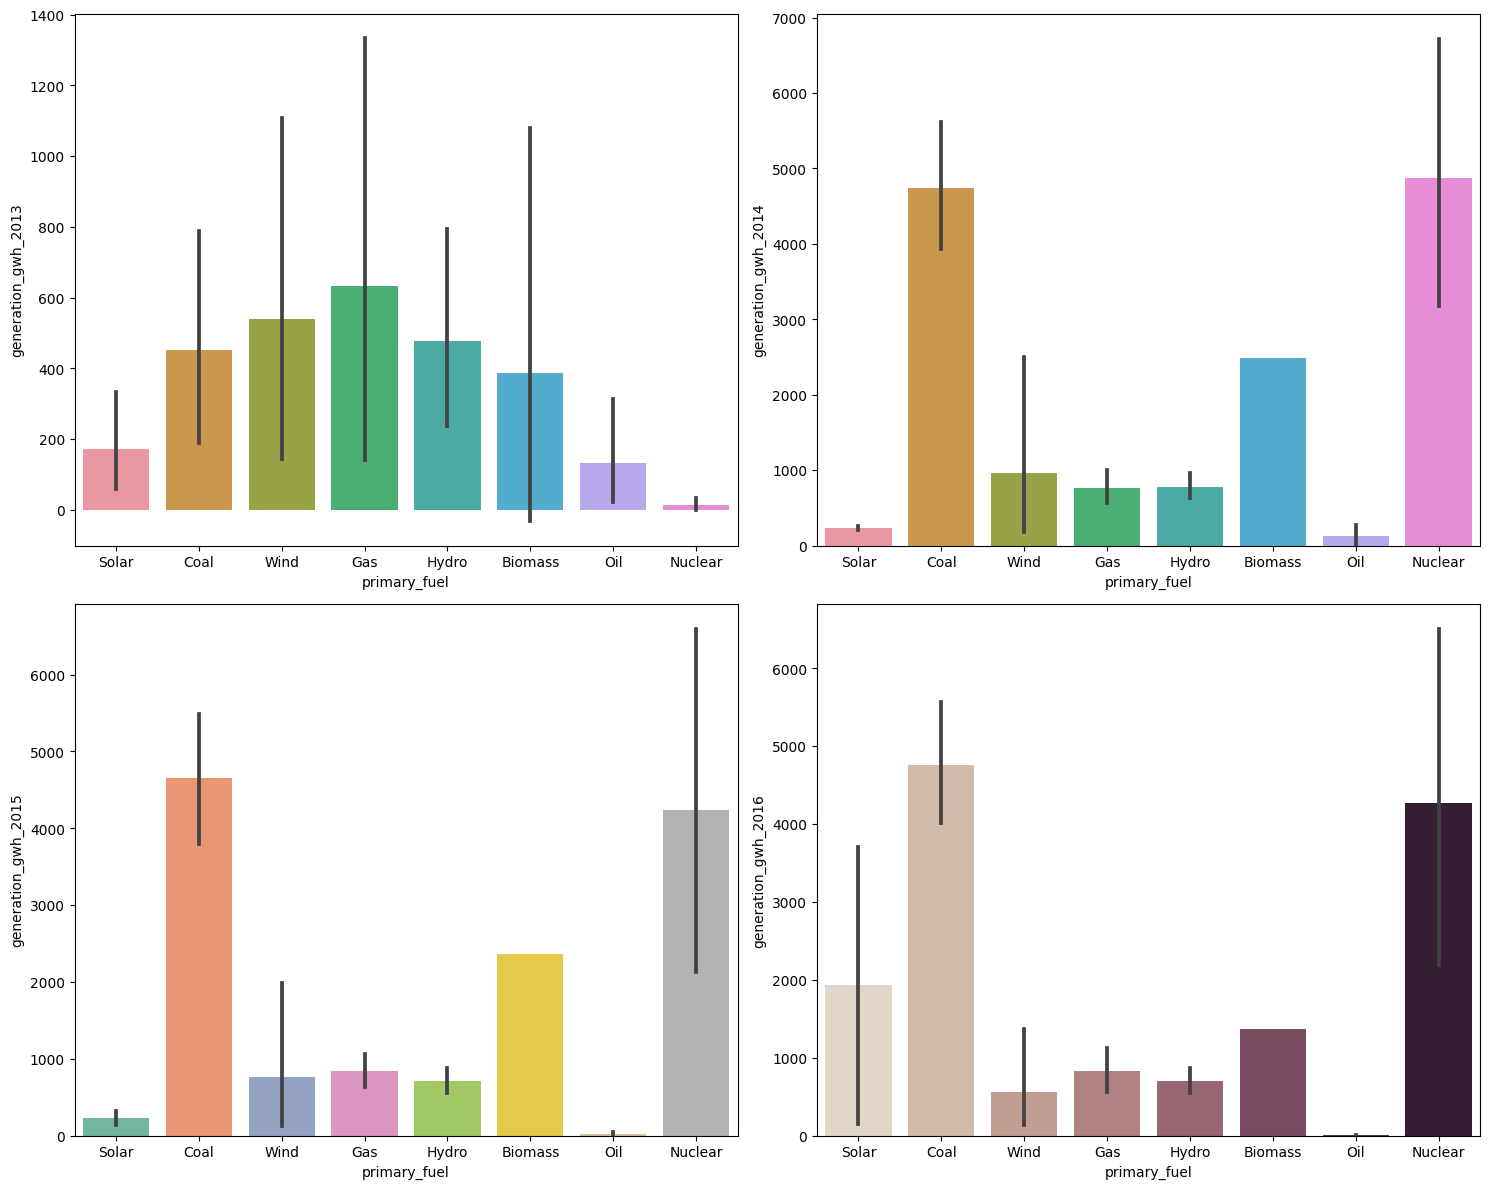

In [54]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2018'>

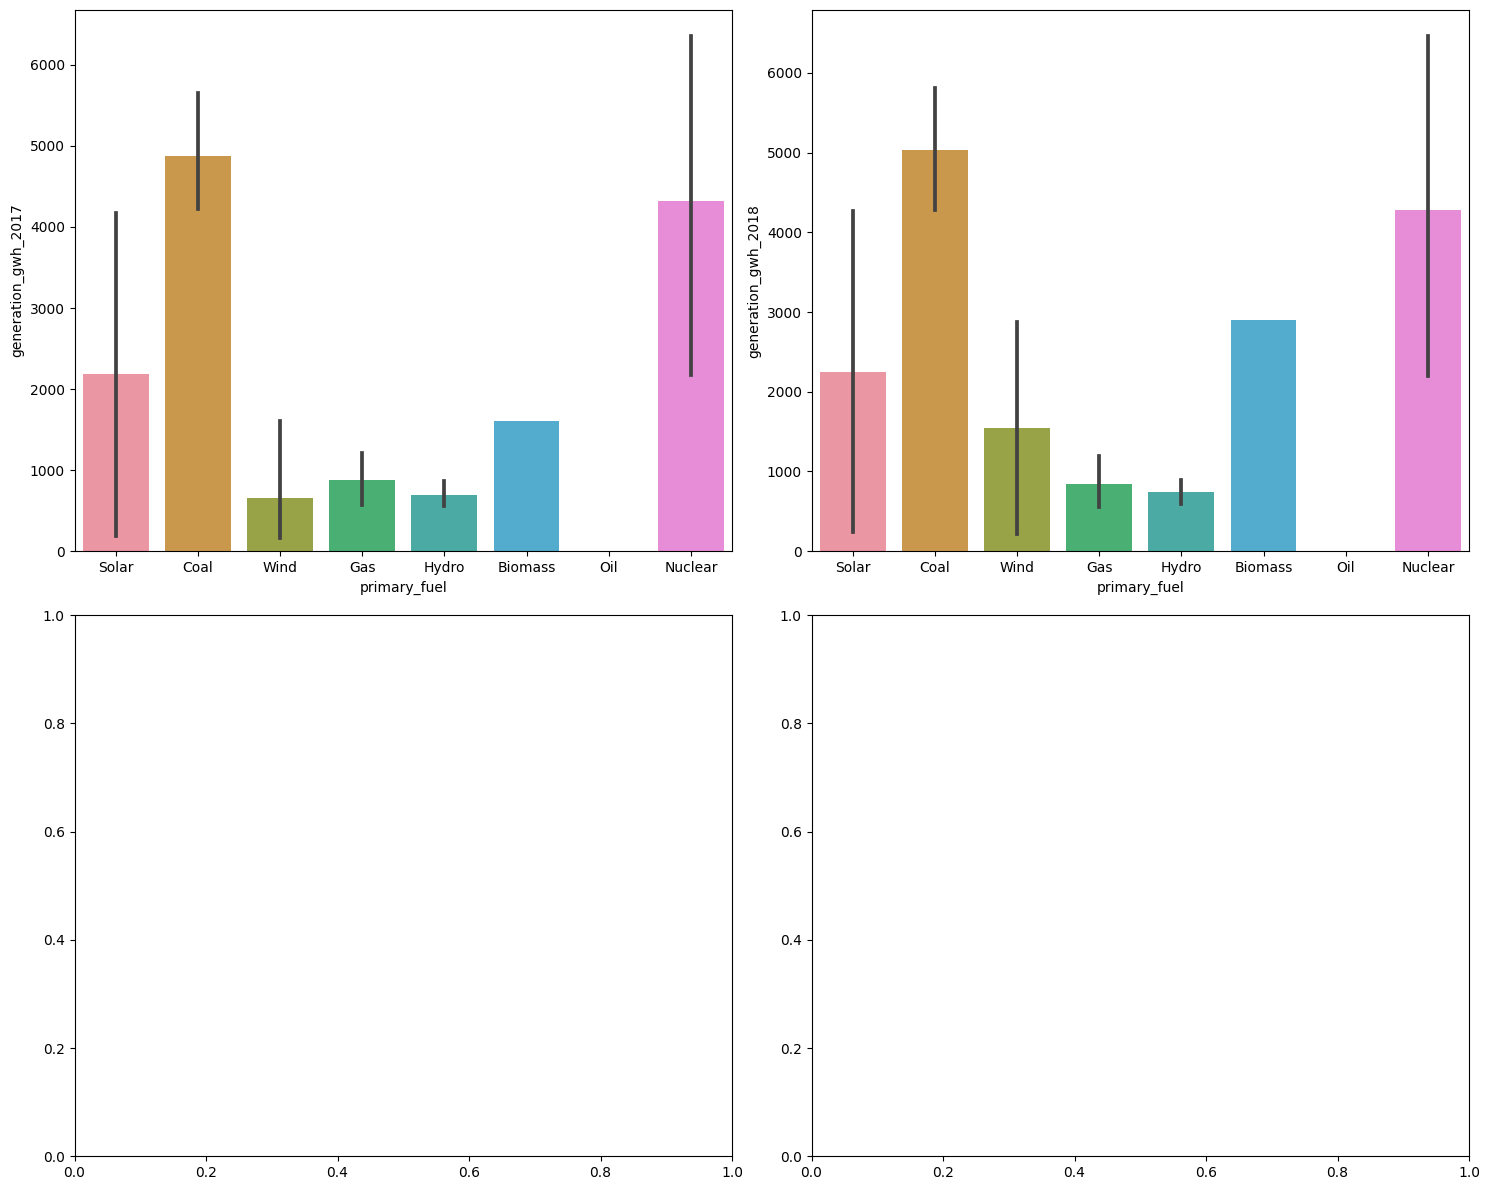

In [60]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[0,1],data=df)

#### comments:
- From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal.
- Reason is high efficieny of Nuclear powerplants.
- Other fuel types have very less contribution to power generation.


### Location vs Primary Fuel

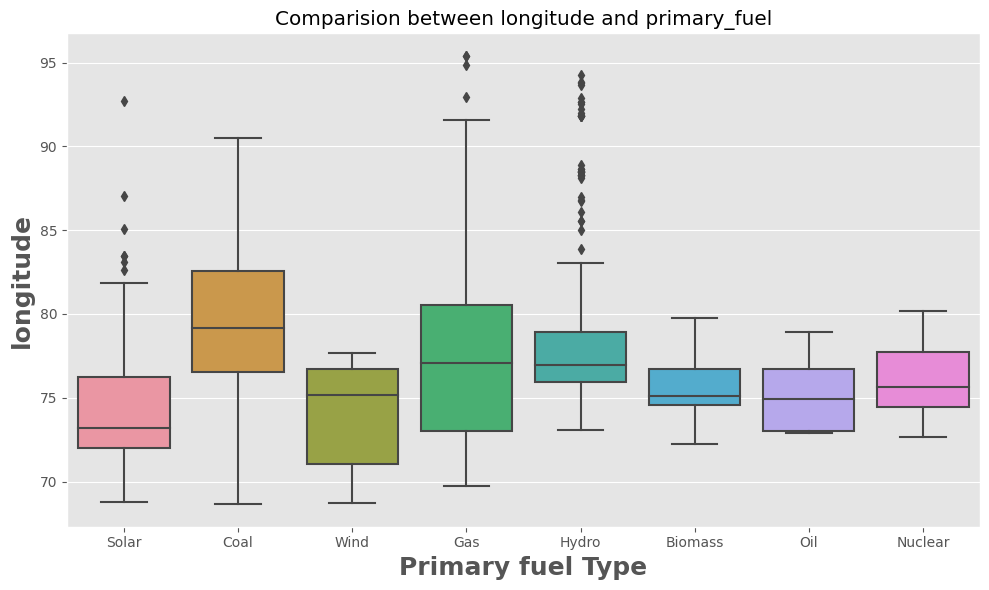

In [62]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x='primary_fuel',y="longitude",data=df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

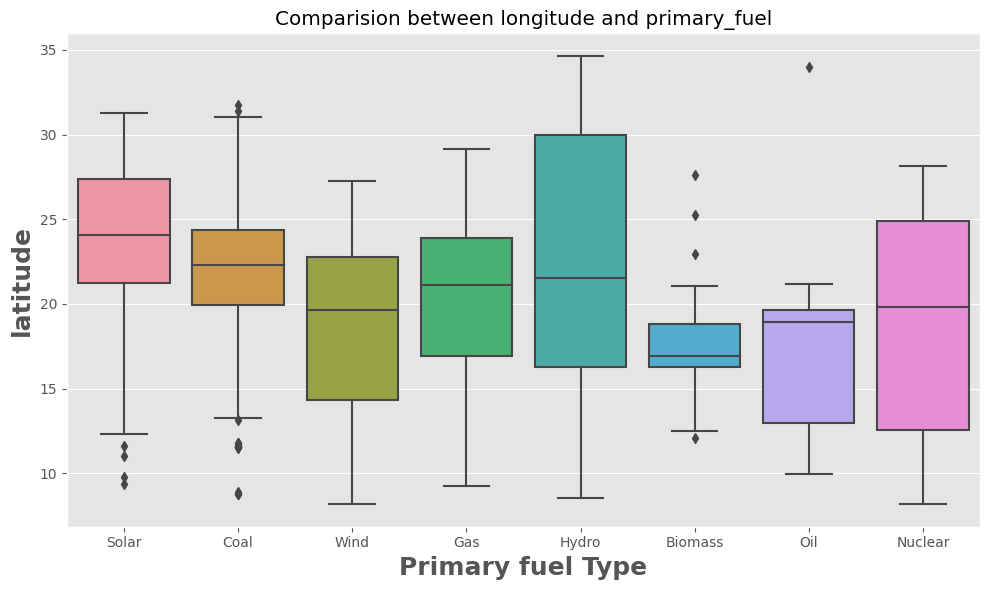

In [63]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x='primary_fuel',y="latitude",data=df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()


#### Comment:
- Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.
- We can also see solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

### Location vs Capacity

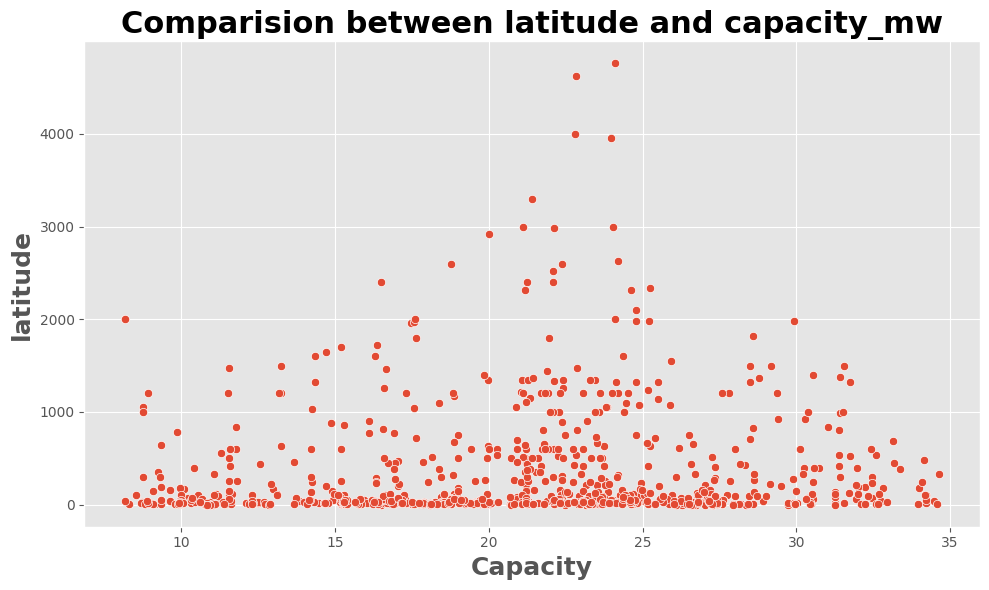

In [65]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(x='latitude',y="capacity_mw",data=df)
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

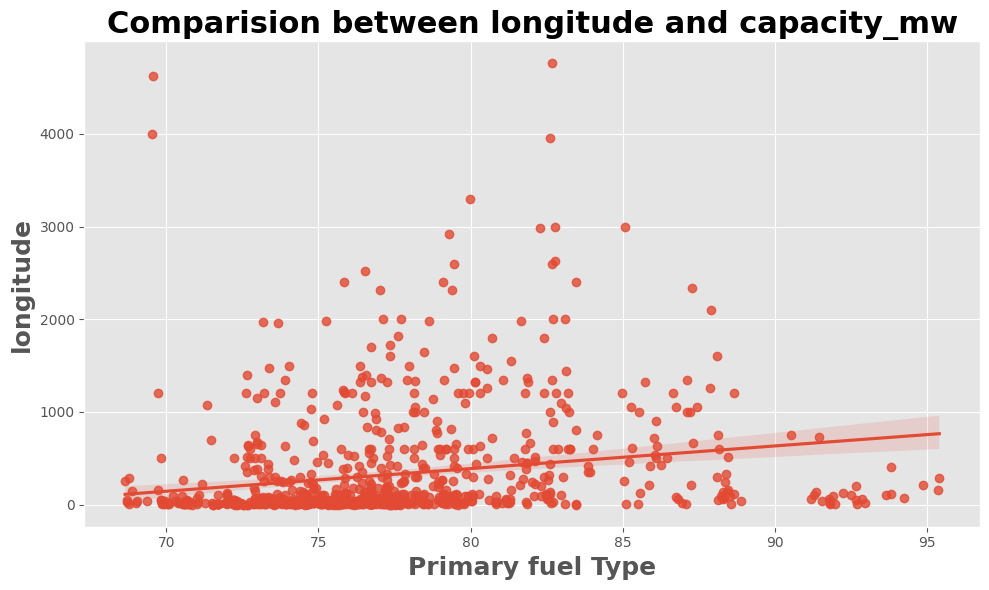

In [66]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(x='longitude',y="capacity_mw",data=df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

##### Nothing significant insight gain from above plots

### Commission age vs primary fuel



In [67]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [68]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 92.0
The youngest powerplant Age : 1.0


In [69]:
df.loc[df.Power_plant_age==92]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,NaN,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,92.0


###### Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.

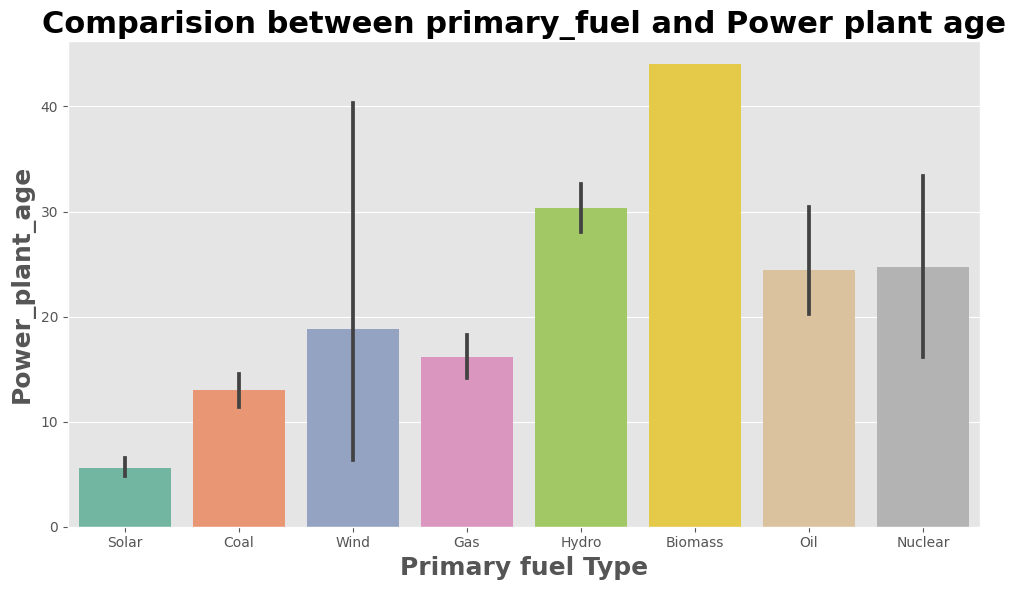

In [70]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<Axes: title={'center': 'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

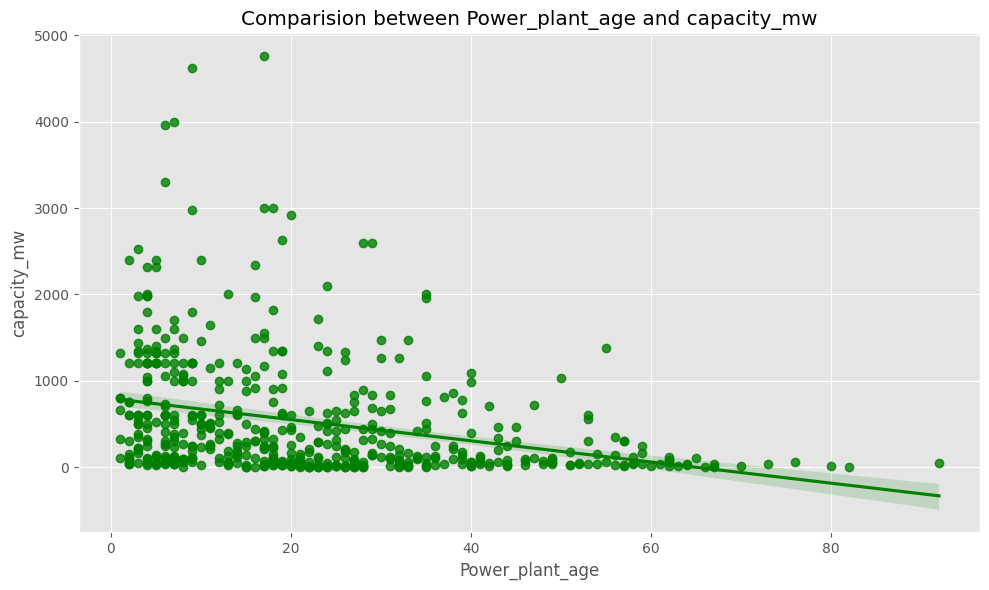

In [72]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x='Power_plant_age',y='capacity_mw',data=df,color = "g")

#### Observations :
- There is negative linear relationship between feature and label.
- We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

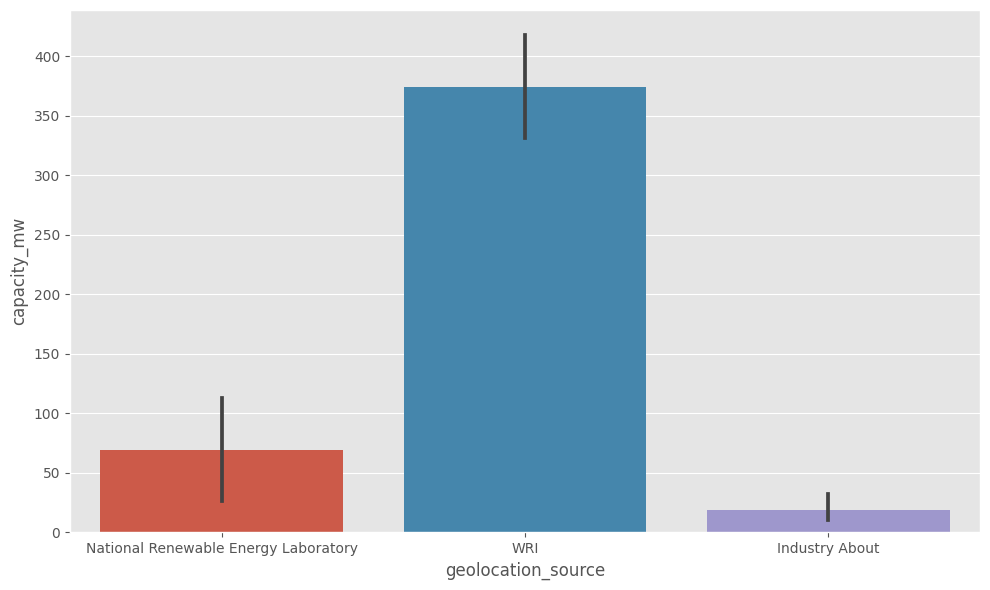

In [73]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

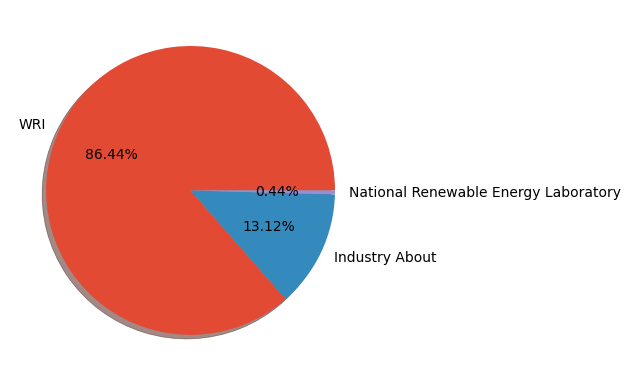

In [74]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

##### The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity

### Distribution of features

In [76]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018' ,'Power_plant_age']

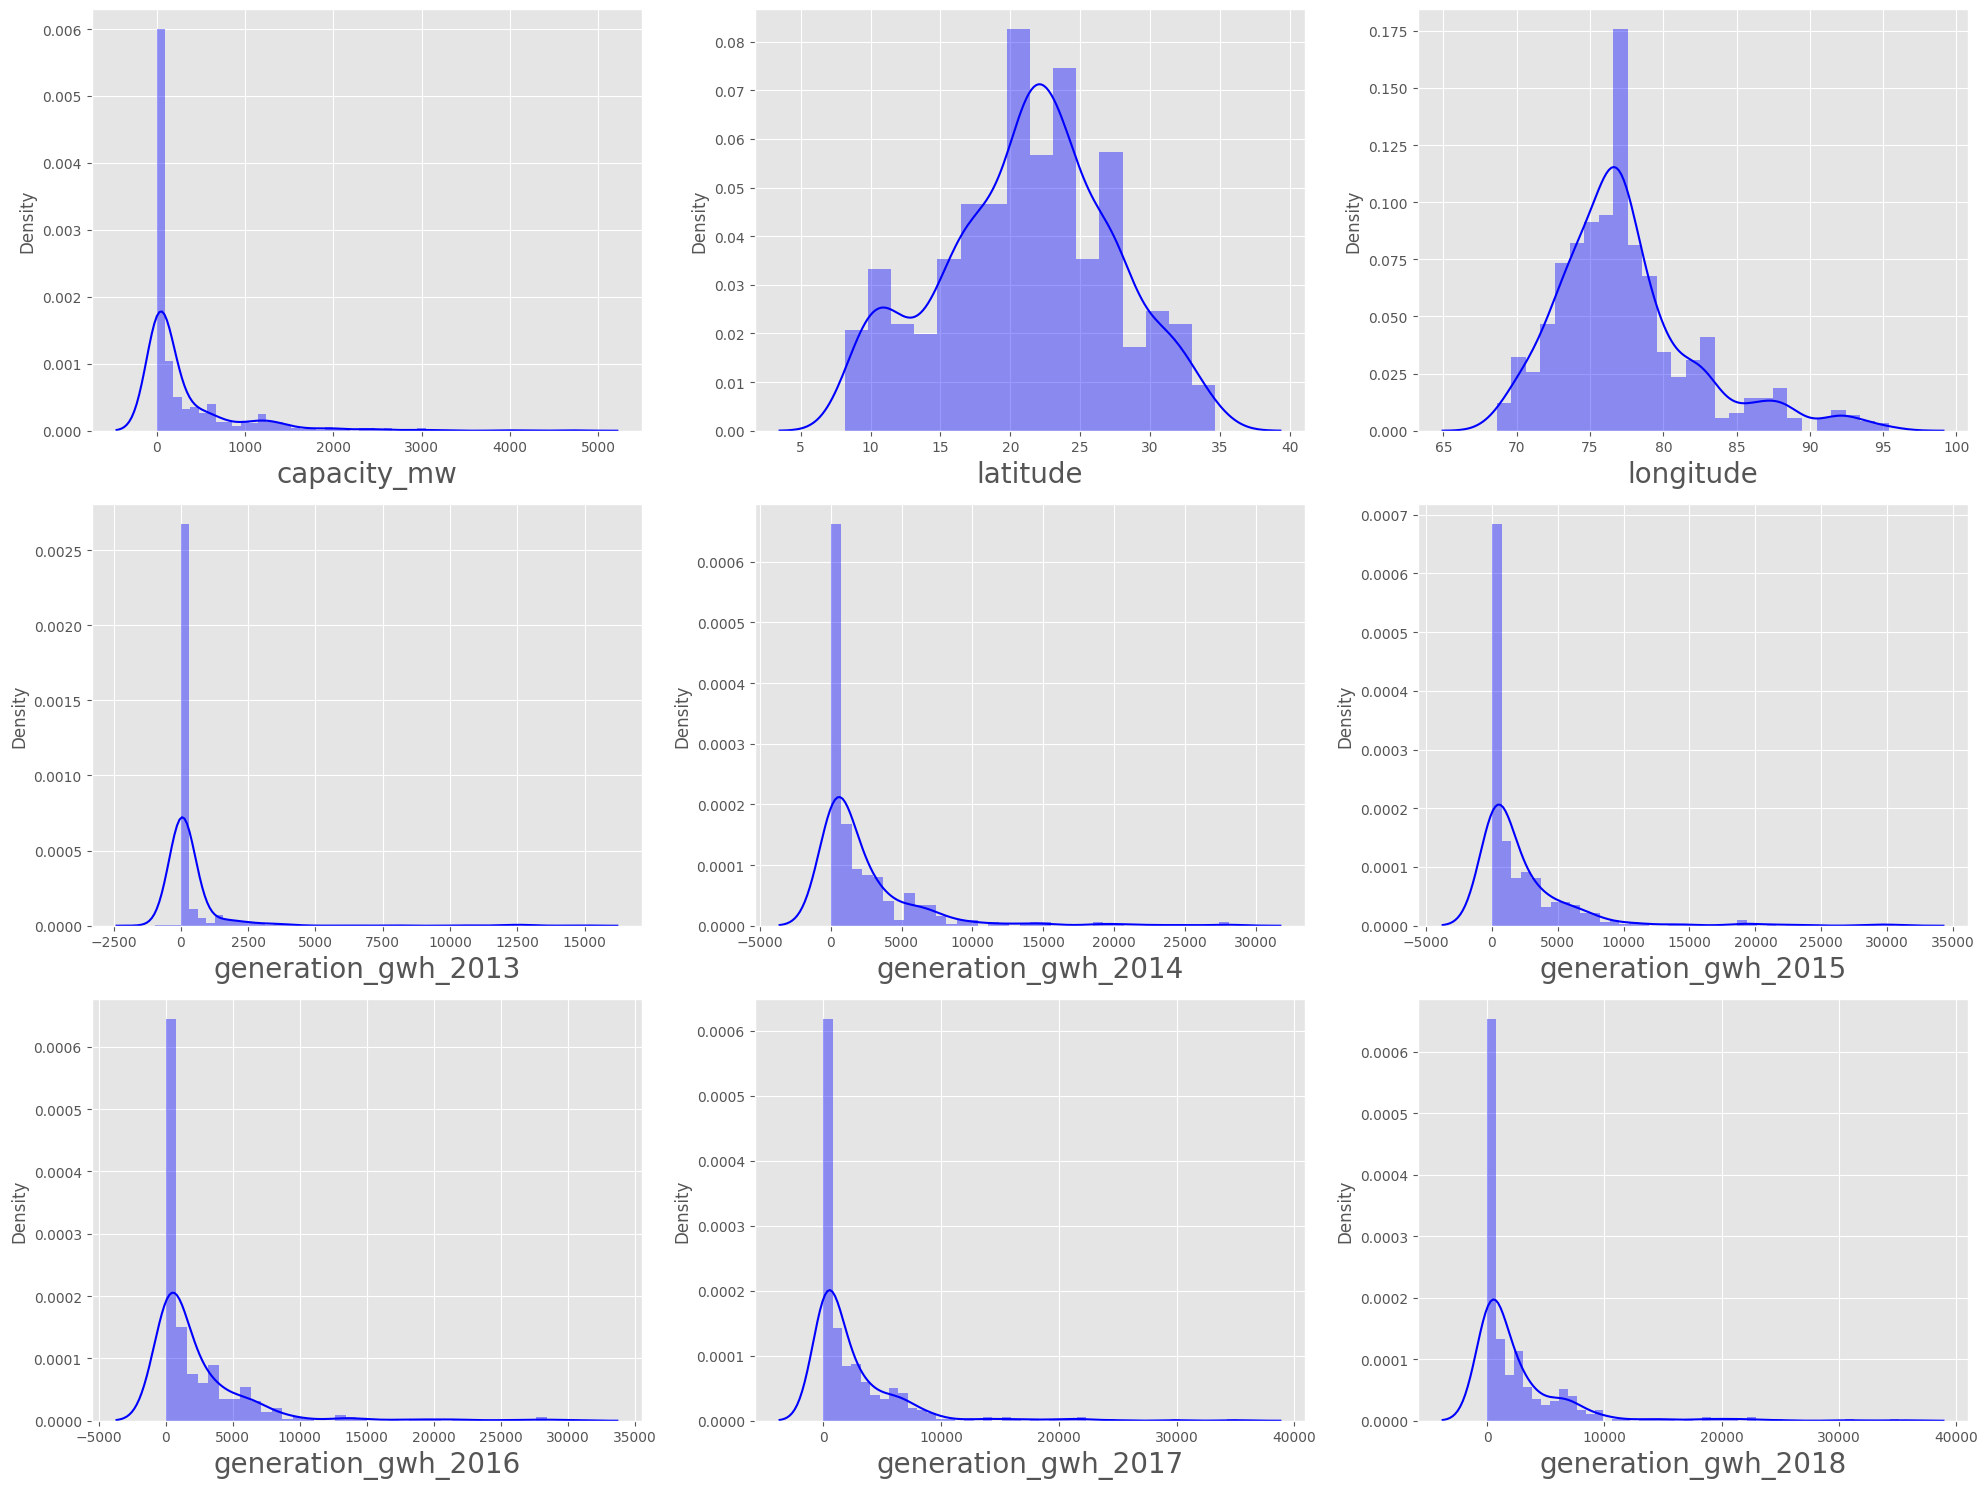

In [77]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### comment:
- From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove the skewness in all these columns except the label later.

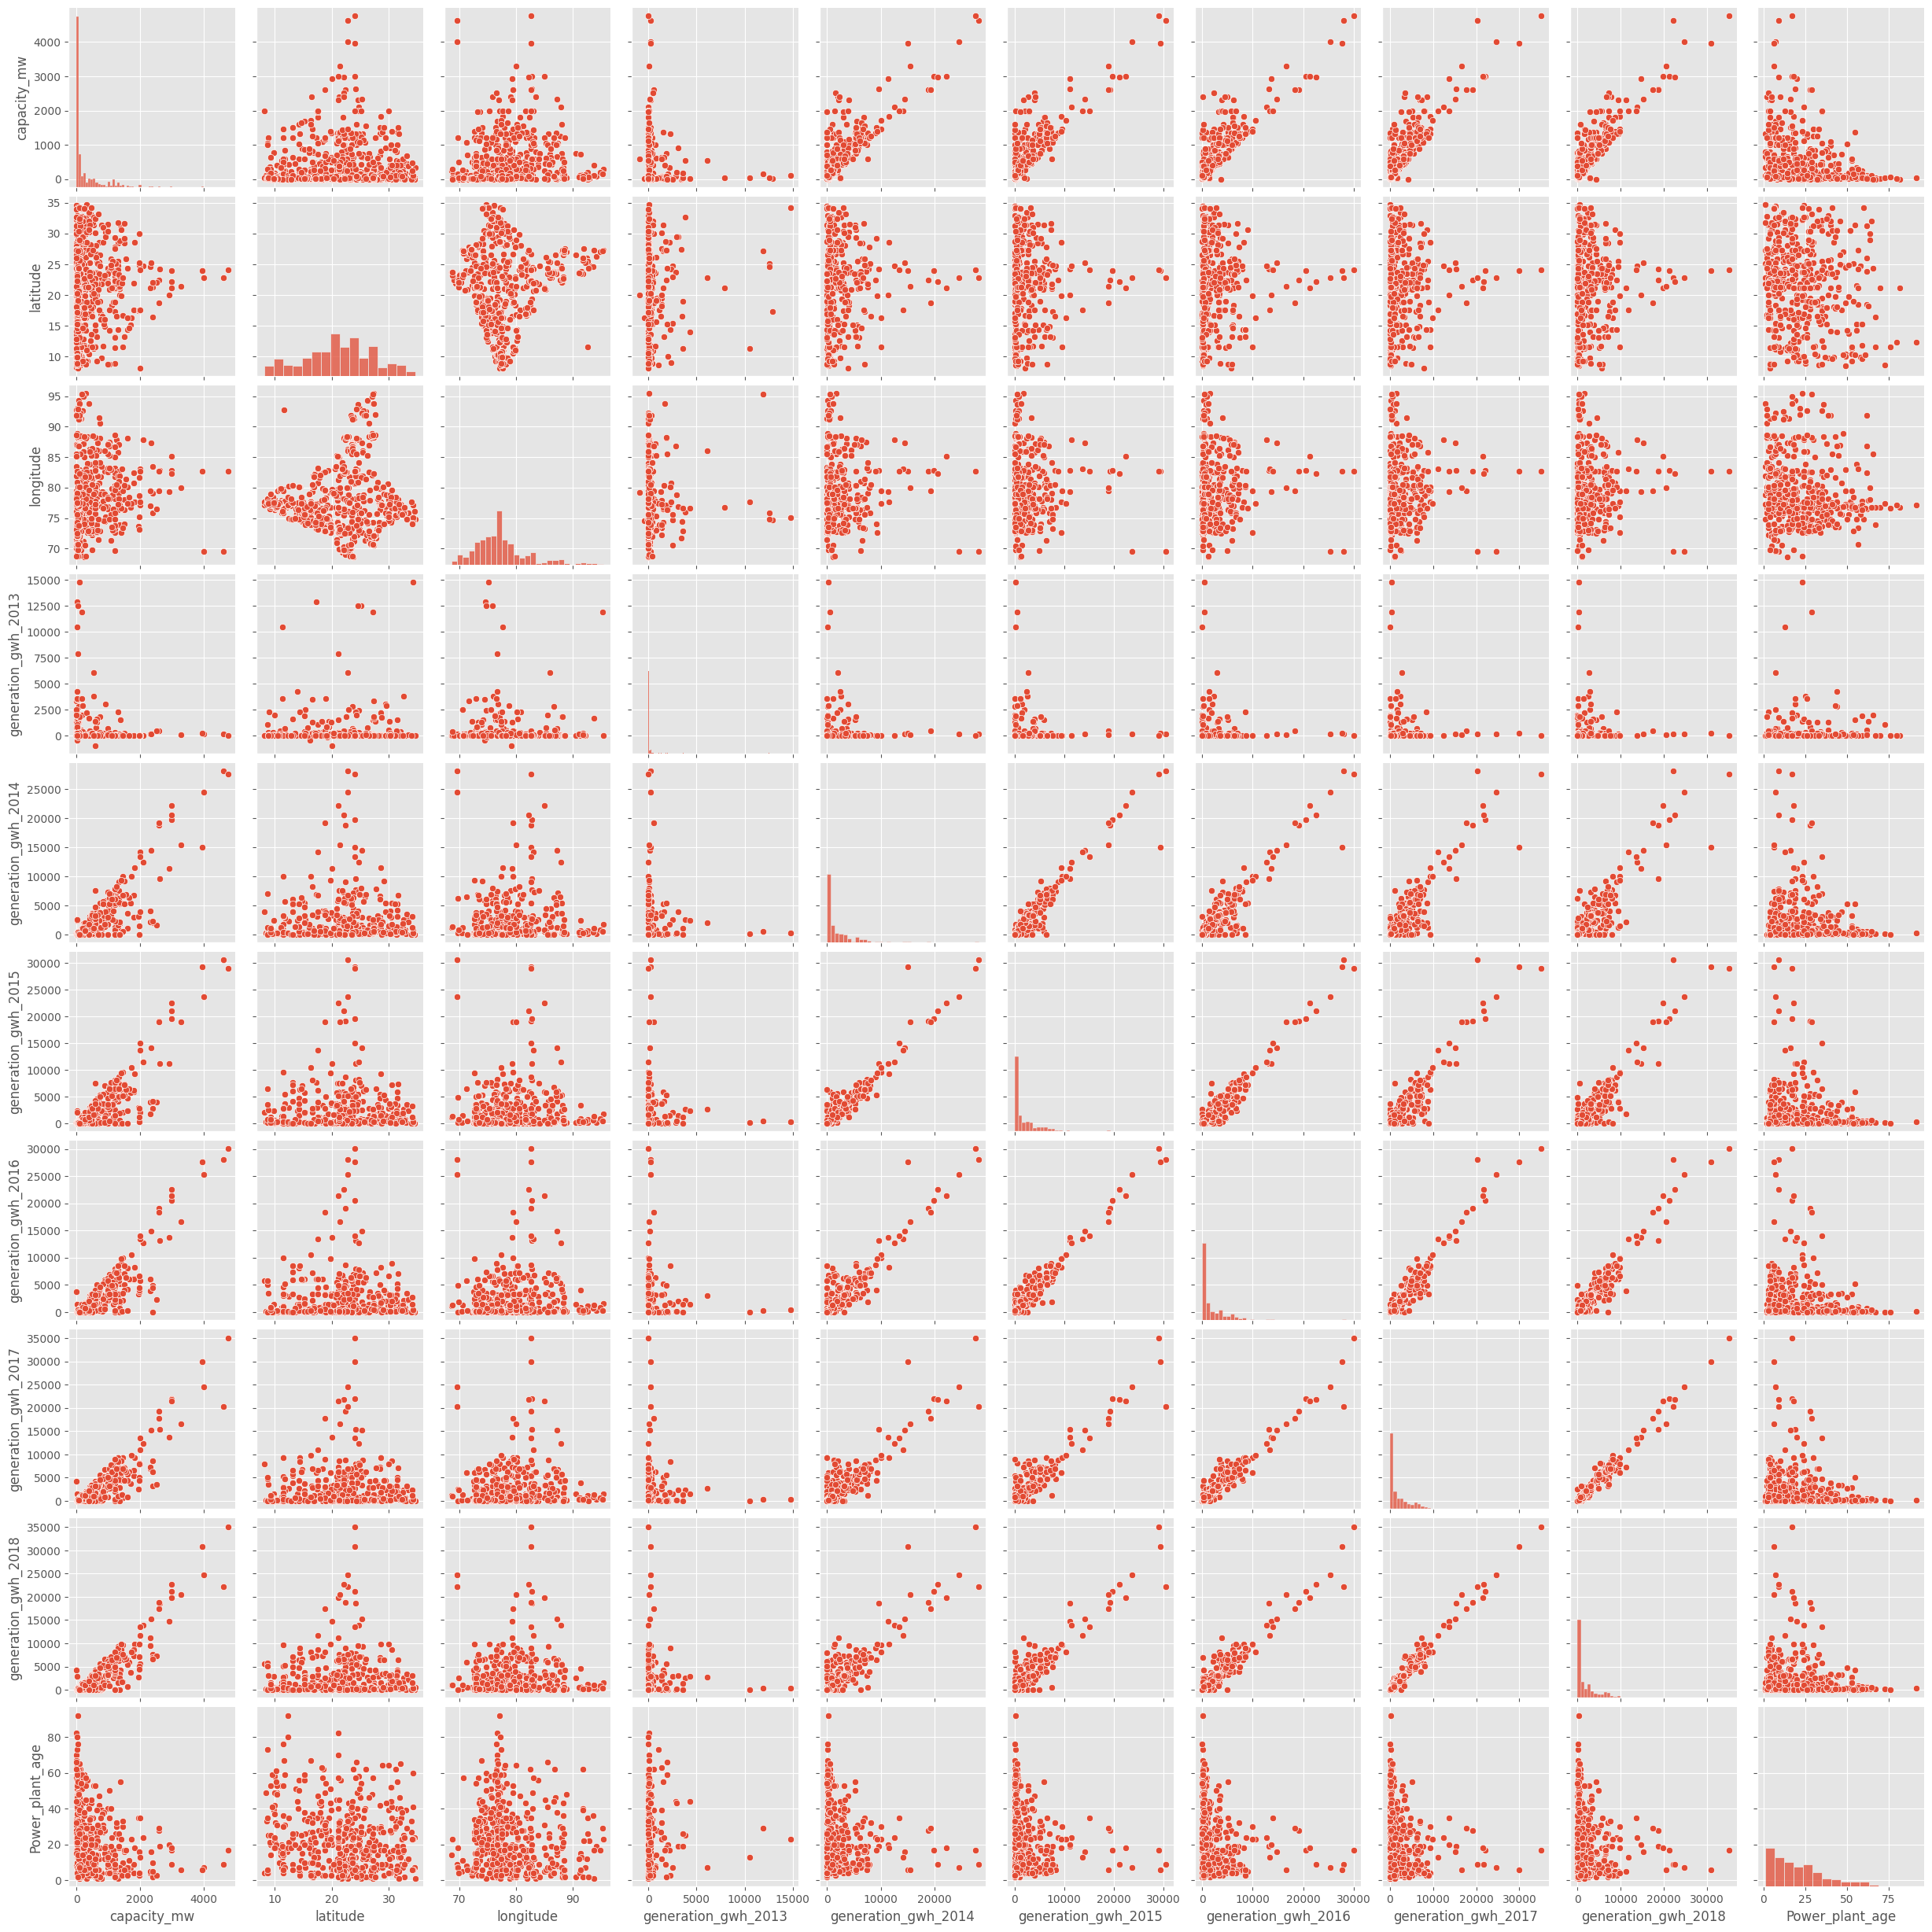

In [78]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

#### comments:
- Most of the features have strong linear relationship and correlation with each other.
- From the plot we can observe the outliers in some of the columns.
- We can see histogram on the diagonal.

### Encoding categorical data

In [80]:
df.drop(columns=['name'],axis=1,inplace=True)

In [81]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [82]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [83]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,1,2,22,2,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,4.0


## Outliers detection and removal

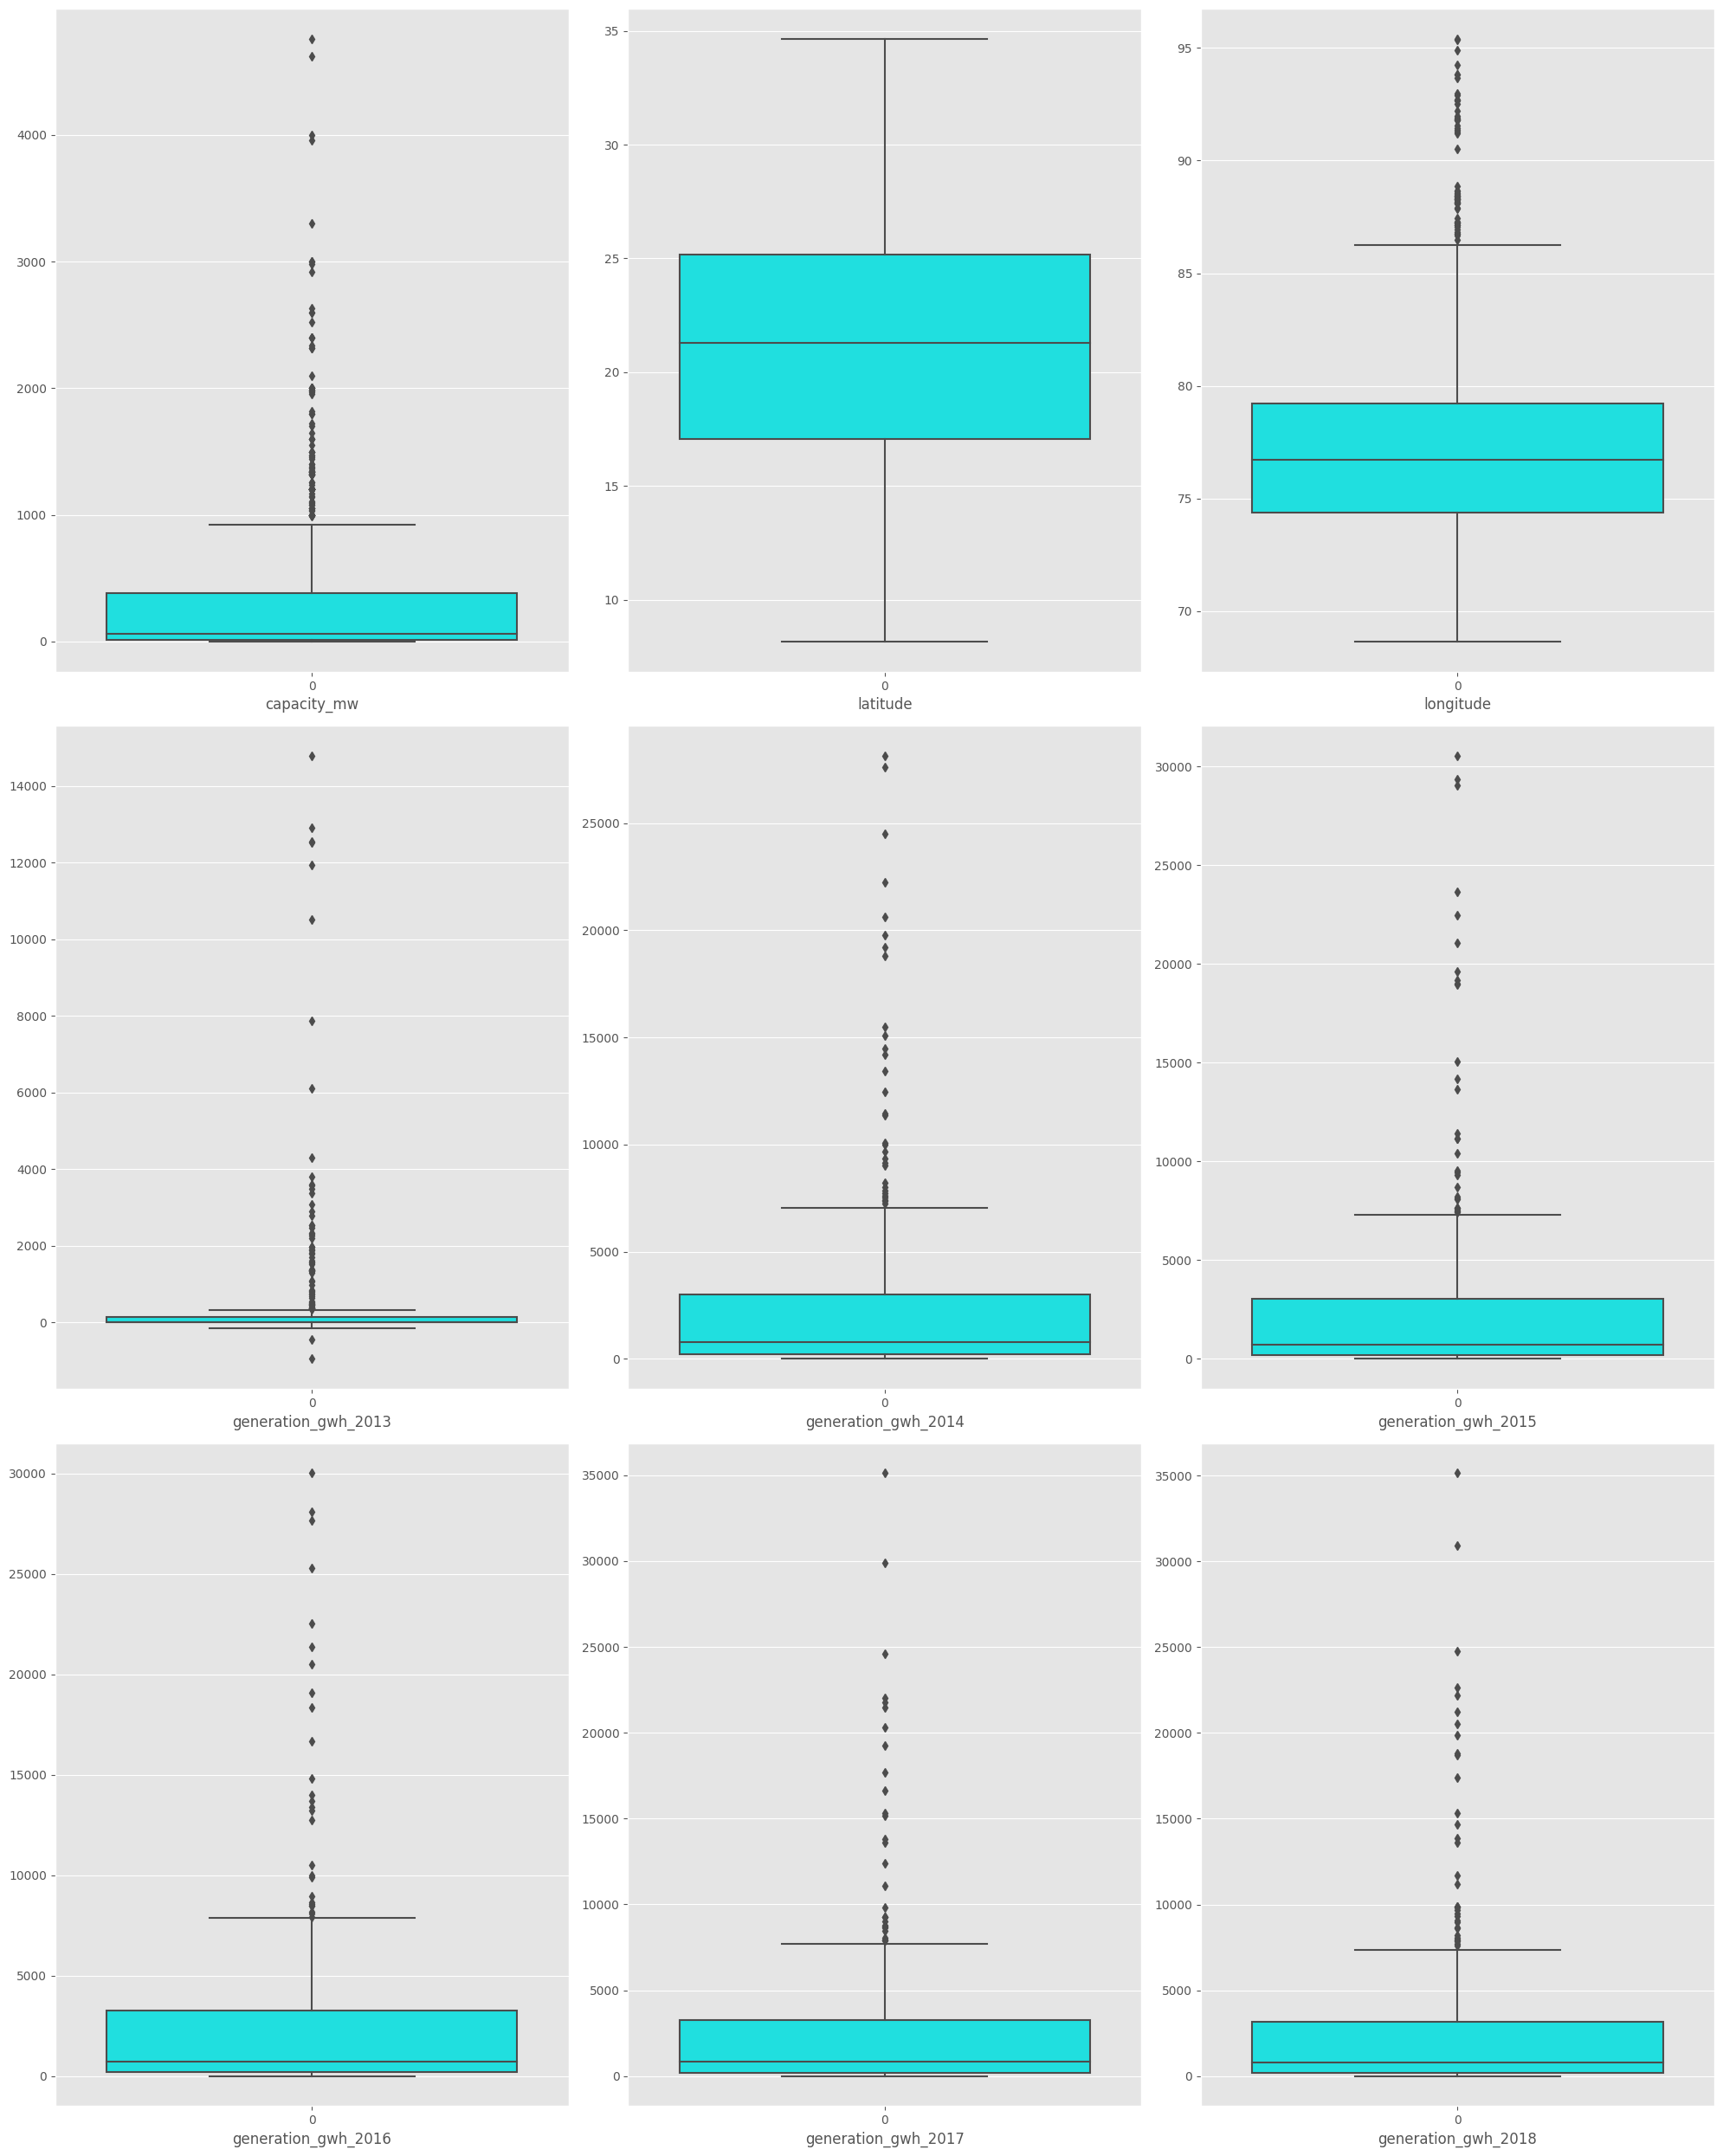

In [84]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

#### comments:
- there are outliers in the dataset.
- There are no outliers in lower capping level.
- So we will use Quantile-based Flooring and Capping technique.

##### Further outliers investigation will be done bases Quantile-based Flooring and Capping technique. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values

In [85]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [86]:
df2=df.copy

In [87]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2013    1282.273750
generation_gwh_2014    5252.204663
generation_gwh_2015    5060.733915
generation_gwh_2016    5157.019802
generation_gwh_2017    5579.967750
generation_gwh_2018    5988.440800
Power_plant_age          39.000000
dtype: float64


In [88]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(854, 12)


In [91]:
# data loss
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((907-854)/854)*100,'%')

Percentage Data Loss : 6.206088992974239 %


## Correlation matrix

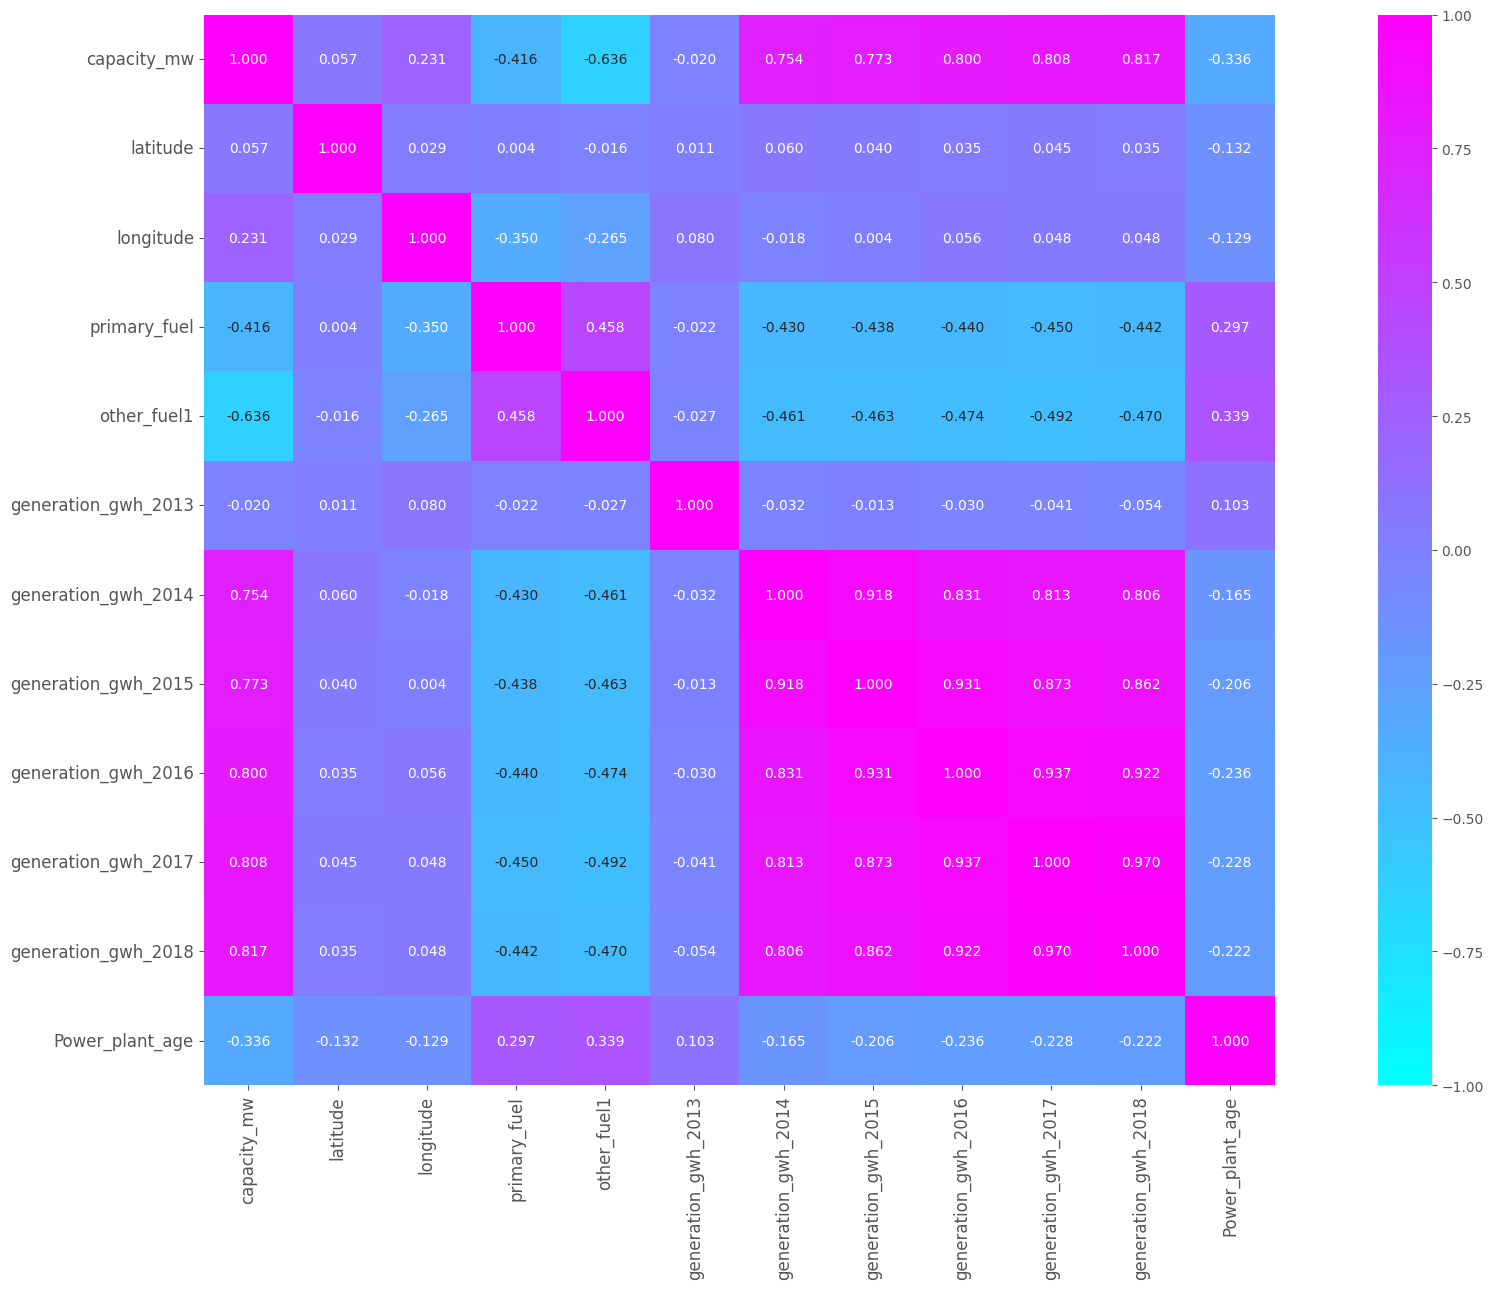

In [92]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- The label capacity_mw is highly positively correlated with the features generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.

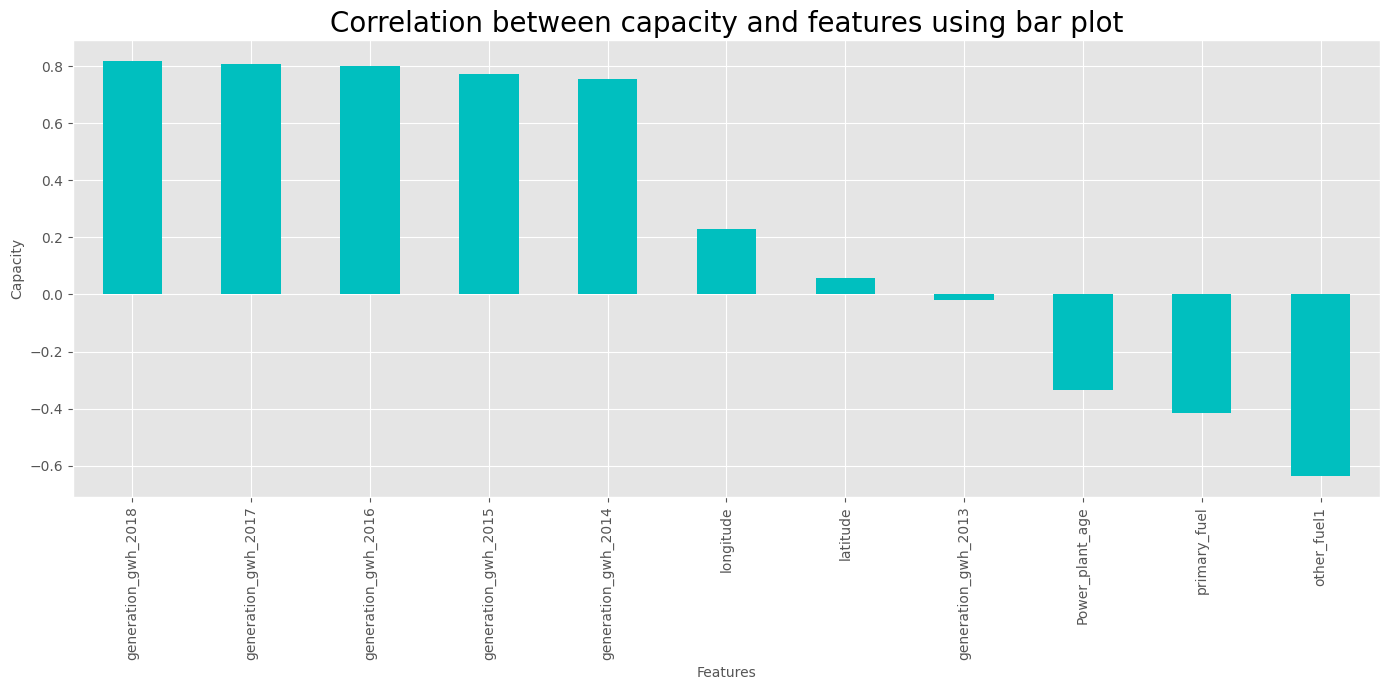

In [93]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()


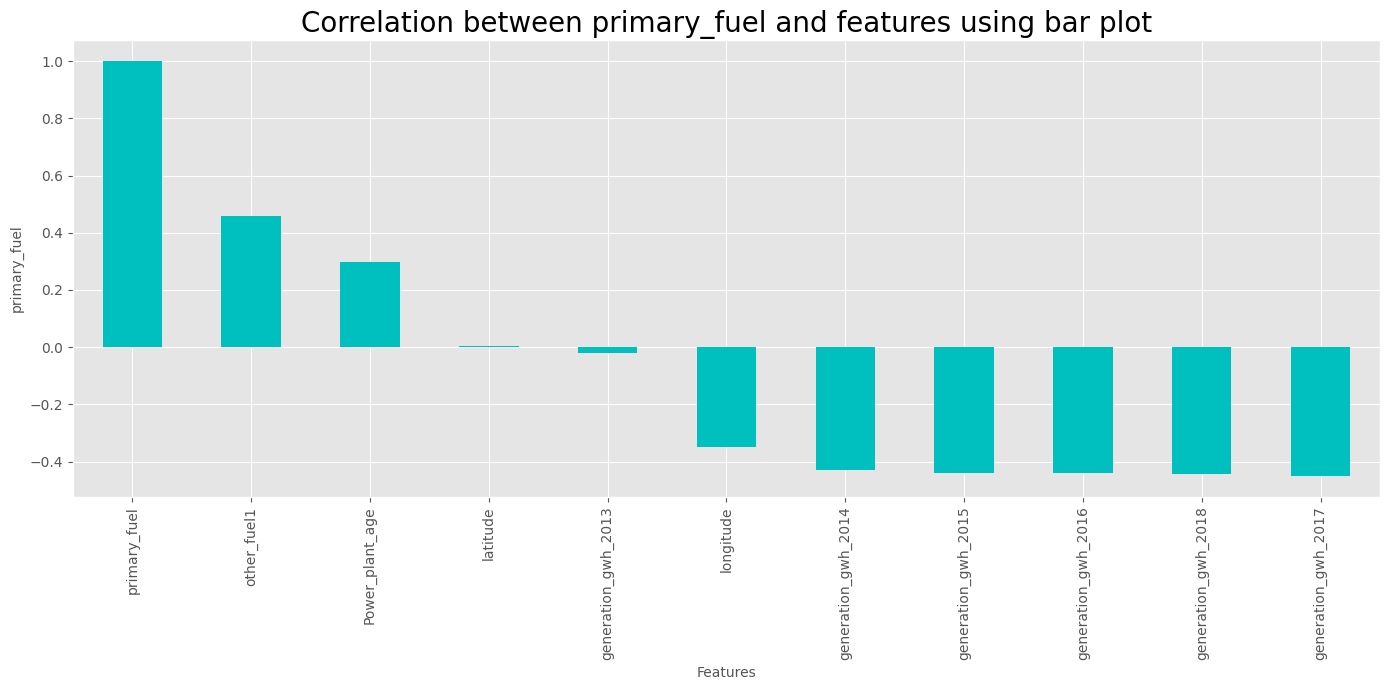

In [94]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

## SKewness

In [95]:
data.skew()

capacity_mw            1.936387
latitude              -0.131956
longitude              1.199632
primary_fuel           0.419692
other_fuel1           -1.821627
generation_gwh_2013    3.351090
generation_gwh_2014    1.609535
generation_gwh_2015    1.528009
generation_gwh_2016    1.582874
generation_gwh_2017    1.473375
generation_gwh_2018    1.512171
Power_plant_age        1.035415
dtype: float64

In [96]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [97]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.931089,0.496704,NaN,NaN,NaN,NaN,NaN,NaN,-0.806941
1,-0.515885,0.496704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.402602,0.496704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.172752,0.496704,-0.318953,-0.114895,0.111218,0.136415,-0.042557,-0.073263,-0.173648
4,1.148004,-2.012837,NaN,0.918059,1.448872,1.496980,1.349972,1.597607,-1.373176


In [98]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            1.936387
latitude              -0.131956
longitude              0.001116
primary_fuel           0.419692
other_fuel1           -1.519243
generation_gwh_2013   -0.805481
generation_gwh_2014   -0.127635
generation_gwh_2015   -0.137056
generation_gwh_2016   -0.136479
generation_gwh_2017   -0.155626
generation_gwh_2018   -0.161315
Power_plant_age       -0.056893
dtype: float64

In [99]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [101]:
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

#### Since we have done with EDA NOW its time for removal of missing data

In [102]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

# Machine learning Model building classification 

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

## Standard Scaling

In [104]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [105]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (597, 4)
Training target vector size: (597,)
Test feature matrix size: (257, 4)
Test target vector size: (257,)


### Finding best Random state


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6070038910505836 on Random_state 476


In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=476, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.6070038910505836


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  2  0  0  0  9]
 [ 0 53  0 20  0  0  2  0]
 [ 0  6  0  7  0  0  0  2]
 [ 0 11  0 52  0  0  1  6]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0  4]
 [ 0  1  0  4  0  0 28  6]
 [ 0  0  0  8  0  0  7 23]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.73      0.71      0.72        75
           2       0.00      0.00      0.00        15
           3       0.54      0.74      0.63        70
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.74      0.72      0.73        39
           7       0.46      0.61      0.52        38

    accuracy                           0.61       257
   macro avg       0.31      0.35      0.32       

### Decision Tree Classifier

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=476, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6653696498054474


Confusion matrix of DecisionTreeClassifier : 
 [[ 9  2  0  0  0  0  0  0]
 [ 2 47 10 11  0  2  3  0]
 [ 0  4  6  5  0  0  0  0]
 [ 0  7  7 51  1  0  1  3]
 [ 0  1  0  1  1  0  0  0]
 [ 0  0  0  2  0  4  0  0]
 [ 1  3  0  0  0  0 29  6]
 [ 2  2  1  1  0  0  8 24]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.71      0.63      0.67        75
           2       0.25      0.40      0.31        15
           3       0.72      0.73      0.72        70
           4       0.50      0.33      0.40         3
           5       0.67      0.67      0.67         6
           6       0.71      0.74      0.72        39
           7       0.73      0.63      0.68        38

    accuracy                           0.67       257
   macro avg       0.62      0.62      0.6

### Random forest classifier

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=476, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7665369649805448


Confusion matrix of RandomForestClassifier : 
 [[ 9  2  0  0  0  0  0  0]
 [ 2 60  5  8  0  0  0  0]
 [ 0  6  5  3  0  1  0  0]
 [ 0  6  2 61  0  0  0  1]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  0  3  0  3  0  0]
 [ 1  1  0  1  0  0 34  2]
 [ 3  5  0  0  0  0  5 25]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.74      0.80      0.77        75
           2       0.38      0.33      0.36        15
           3       0.79      0.87      0.83        70
           4       0.00      0.00      0.00         3
           5       0.75      0.50      0.60         6
           6       0.87      0.87      0.87        39
           7       0.89      0.66      0.76        38

    accuracy                           0.77       257
   macro avg       0.63      0.61      0.6

### ExtraTreesClassifier()

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=476, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7859922178988327


Confusion matrix of ExtraTreesClassifier : 
 [[10  1  0  0  0  0  0  0]
 [ 1 61  6  6  0  0  1  0]
 [ 0  5  6  3  0  1  0  0]
 [ 0  6  1 61  1  0  0  1]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  3  0  3  0  0]
 [ 1  5  0  0  0  0 31  2]
 [ 2  3  0  0  0  0  3 30]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.73      0.81      0.77        75
           2       0.46      0.40      0.43        15
           3       0.82      0.87      0.85        70
           4       0.00      0.00      0.00         3
           5       0.75      0.50      0.60         6
           6       0.89      0.79      0.84        39
           7       0.91      0.79      0.85        38

    accuracy                           0.79       257
   macro avg       0.66      0.63      0.64       

## Cross validation

In [115]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('===========================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.5497076  0.49122807 0.52046784 0.52631579 0.51176471]
Mean Score : 0.5198968008255933
Std deviation : 0.019069559349225305




Cross Validation Score DecisionTreeClassifier() :

Score : [0.74269006 0.66666667 0.67836257 0.70760234 0.66470588]
Mean Score : 0.6920055039559683
Std deviation : 0.029616349921949225




Cross Validation Score RandomForestClassifier() :

Score : [0.73684211 0.77192982 0.77777778 0.75438596 0.74117647]
Mean Score : 0.756422428620571
Std deviation : 0.01622655693628037




Cross Validation Score ExtraTreesClassifier() :

Score : [0.74853801 0.75438596 0.76023392 0.76023392 0.77058824]
Mean Score : 0.7587960096319228
Std deviation : 0.007319381993619904




#### Here the best performance is shown by the extra tree classifier model so we will consier it as for further hyperparameter tuning

# Hyper Parameter Tuning : GridSearchCV

In [116]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameter = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [123]:
grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5, scoring='accuracy')



In [125]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [126]:
print("Best score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

Best score:  0.7470588235294118
Best parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [121]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

# Final classification model

In [131]:
final_mod = grid_search.best_estimator_
y_pred = final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7937743190661478


## Saving the model

In [132]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']

# Machine Learning Model Building Regression

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

### feature Enfineering before proceeding

In [136]:
df2=df.copy()

In [137]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2013    1282.273750
generation_gwh_2014    5252.204663
generation_gwh_2015    5060.733915
generation_gwh_2016    5157.019802
generation_gwh_2017    5579.967750
generation_gwh_2018    5988.440800
Power_plant_age          39.000000
dtype: float64


In [138]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(854, 12)


In [139]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.931089,0.496704,NaN,NaN,NaN,NaN,NaN,NaN,-0.806941
1,-0.515885,0.496704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.402602,0.496704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.172752,0.496704,-0.318953,-0.114895,0.111218,0.136415,-0.042557,-0.073263,-0.173648
4,1.148004,-2.012837,NaN,0.918059,1.448872,1.496980,1.349972,1.597607,-1.373176


In [140]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [141]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

In [142]:
data.drop("generation_gwh_2018",axis=1,inplace=True)

### Standard Scaling

In [143]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [144]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (572, 4)
Training target vector size: (572,)
Test feature matrix size: (282, 4)
Test target vector size: (282,)


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.3245319618987774 on Random_state 474


### Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=474, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 2.78848600e+02  2.71164242e+02  3.80442583e+02  2.55771599e+02
  1.47871242e+02  2.85423101e+02  4.08664613e+02  3.82429976e+02
  1.22081015e+02  6.85236826e+01  1.18780422e+02  1.07869054e+02
  4.57648139e+02  2.04380116e+02  1.28090461e+02  1.77340268e+02
  2.84083436e+02  3.75497676e+02  3.23491970e+02  3.43754349e+02
  2.17261609e+02  3.77105284e+02  4.94261714e+02  1.84357024e+02
  4.05959237e+01  4.21970698e+02  3.93406678e+02  1.68520401e+01
  1.05196071e+02  3.95258421e+02  6.94941195e+01  9.38232008e+01
  3.67288843e+02  4.47953343e+02  6.72659958e+01  2.63523433e+02
  6.72138493e+01  1.68665917e+02  3.68574588e+02  4.20951977e+02
  1.08100038e+00  1.39695537e+02  8.80301563e+01  4.07622719e+02
  9.97397920e+01  5.63840803e+02  1.42418694e+00  4.27986645e+02
  1.21078421e+02  1.08634359e+02 -2.08598967e+01  2.91253659e+02
  4.15902535e+02  3.59676080e+02  5.17810781e+02  2.70785117e+02
  5.04451846e+02  4.92449403e+02  3.14037120e+02  6.72840317e+01
 -2.7696

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 216.95301161131025
Mean squared error : 97905.00099446879
Root Mean Squared Error: 312.8977484650038


 R2 Score :
0.32193030960799296


## Applying other ML Models

In [149]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 141.27950187221762
Mean squared error : 61968.24572489291
Root Mean Squared Error: 248.93421967438087


 R2 Score :
0.570820808273238


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 216.95316815632833
Mean squared error : 97905.16512389059
Root Mean Squared Error: 312.8980107381486


 R2 Score :
0.32192917288172673


 Error of  DecisionTreeRegressor() :
Mean absolute error : 168.27101676144866
Mean squared error : 106850.96207500217
Root Mean Squared Error: 326.8806541767227


 R2 Score :
0.2599724423027373


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 172.7969414004054
Mean squared error : 68190.98655394245
Root Mean Squared Error: 261.1340394394083


 R2 Score :
0.5277233984935097


 Error of  GradientBoostingRegressor() :
Mean absolute error : 151.316977200343
Mean squared error : 61120.166554149444
Root Mean Squared Error: 247.22493109342642


 R2 Score :
0.5766944283630475


 Error of  

In [150]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.4819694201604401


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.23138043067500907


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.13074817373377293


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.46613232007620803


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.4723010429135943


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max

#### Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.


In [151]:
from sklearn.model_selection import GridSearchCV

In [155]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [156]:
GCV = GridSearchCV(RandomForestRegressor(),parameter)

In [157]:
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]})

In [158]:
GCV.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}

##  Final Regression Model

In [160]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 , max_depth= 10, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 150.8627817018972
Mean squared error : 63784.48412157649
Root Mean Squared Error: 252.555902963238


 R2 Score of Final Model :
0.5582419185862149




 True Values Vs Predicted Value plot :


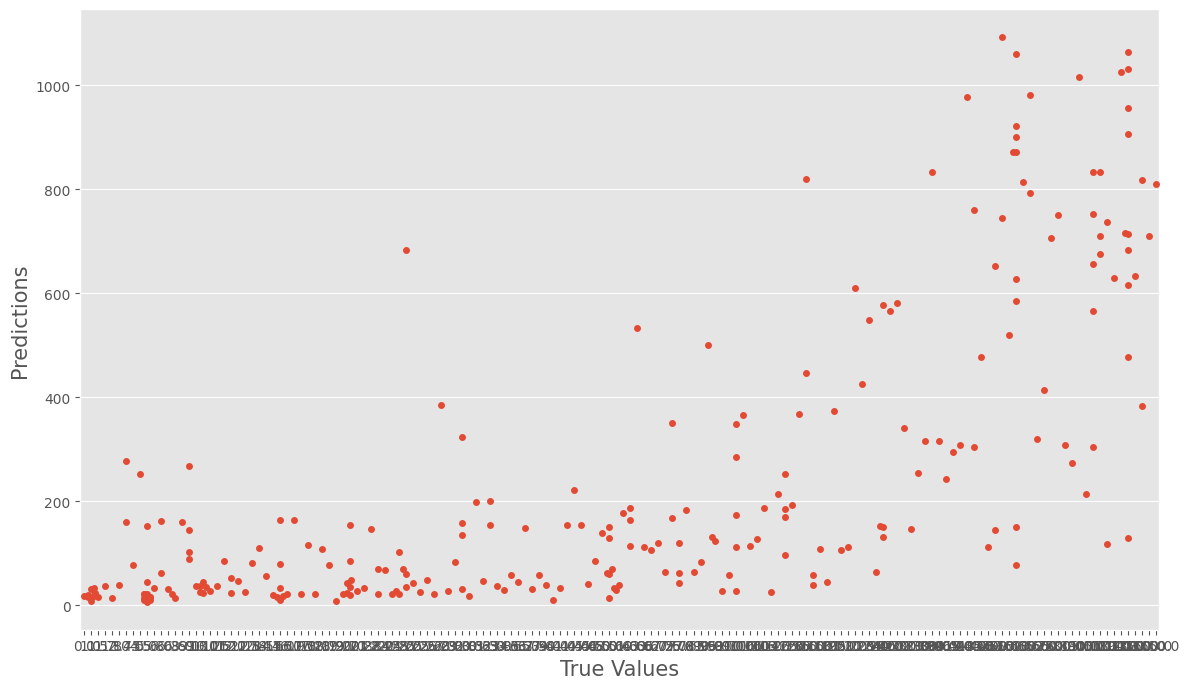

In [162]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Final Regression Saving Model

In [163]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']